In [2]:
class point:
    def __init__(point,x_coord, y_coord):
        point.x = x_coord
        point.y = y_coord

    def __repr__(self):
        return '({}, {})'.format(self.x, self.y)

    #def readable(self):
        #return '({0}, {1})'.format(
        #self.x,
        #self.y,
        #)

In [3]:
point(2,5)

(2, 5)

In [4]:
class line:
    def __init__(self, a1, a2):
        self.side1 = a1
        self.side2 = a2

    def __repr__(self):
        return 'segmento di estremi ({0}, {1}) e ({2}, {3})'.format(
            self.side1.x,
            self.side1.y,
            self.side2.x,
            self.side2.y
        )
    
    def middle_point(self):
        m_x = (self.side1.x + self.side2.x) / 2.0
        m_y = (self.side1.y + self.side2.y) / 2.0
        pM = point(m_x , m_y)
        return(pM)

    def slope(self):
        # m = (y_2 - y_1)/(x_2 - x_1)
        # q = y_1 - x_1 * (y_2 - y_1)/(x_2 - x_1)
        # y = m * x + q
        if (self.side2.x - self.side1.x)==0:   #caso patologico: retta parallela all'asse y
            return print("retta parallela all'asse y")  
        else:
            m = (self.side2.y - self.side1.y)/(self.side2.x - self.side1.x)
            return(m)
    
    def intercept(self):
        if (self.side2.x - self.side1.x)==0:
            return 
        else:
            q = self.side1.y - self.side1.x * (self.side2.y - self.side1.y)/(self.side2.x -  self.side1.x)
            return(q)
    
    def distance(self, pnt_x, pnt_y):
        import math
        # d(P,r)= |y_p - (m * x_P + q)| / sqrt(1 + m**2)
        
        #P = point(pnt)
        x_P = pnt_x
        y_P = pnt_y
        
        if (self.side2.x - self.side1.x)==0: 
            d = abs(x_P - self.side1.x) # cura del caso patologico: in caso di retta // asse y la distanza si riduce 
            return(d)                   # al modulo della differenza tra le ascisse
        
        else:
            d = abs(y_P - (self.slope() * x_P + self.intercept() )) / math.sqrt(1 + (self.slope() ** 2) )
            return(d)
    
    def contain(self, pnt_x, pnt_y):
        if self.distance( pnt_x, pnt_y) == 0 :
            return(True)
        else:
            return(False)
        
    def lenght(self):
        import math
        l = math.sqrt(
            (self.side1.x + self.side2.x) **2 + (self.side1.y + self.side2.y) **2 
            )
        return(l)

In [5]:
a1 = point(0 , 0)
a2 = point(0 , 1)
segment = line( a1 , a2 )

print(segment)

medio1 = segment.middle_point()
print("punto medio = ", medio1)

emme = segment.slope()
print("pendenza = ", emme)

qu = segment.intercept()
print("intercetta all'origine = ", qu)

punto_a_caso = (0.5 , 0.5)
distanza = segment.distance(punto_a_caso[0], punto_a_caso[1])
print("punto scelto = ",punto_a_caso)
print("distanza punto-segmento = ",distanza)

#punto_a_caso1 = (1 , 2)
#distanza = segment.distance(punto_a_caso1[0], punto_a_caso1[1])
#print("punto scelto1 = ",punto_a_caso1)
#print("distanza punto-segmento = ",distanza)

check = segment.contain(punto_a_caso[0], punto_a_caso[1])
print("Il punto è contenuto nel segmento? ", check)

lunghezza = segment.lenght()
print("lunghezza segmento = ", lunghezza)


segmento di estremi (0, 0) e (0, 1)
punto medio =  (0.0, 0.5)
retta parallela all'asse y
pendenza =  None
intercetta all'origine =  None
punto scelto =  (0.5, 0.5)
distanza punto-segmento =  0.5
Il punto è contenuto nel segmento?  False
lunghezza segmento =  1.0


In [6]:
import math
a1 = point(0 , 0)
a2 = point(1 , 1)
segment = line( a1 , a2 )

print(segment)

medio1 = segment.middle_point()
print("punto medio = ", medio1)

emme = segment.slope()
print("pendenza = ", emme)

qu = segment.intercept()
print("intercetta all'origine = ", qu)

punto_a_caso = (0.5 , 0.5)
distanza = segment.distance(punto_a_caso[0], punto_a_caso[1])
print("punto scelto = ",punto_a_caso)
print("distanza punto-segmento = ",distanza)

#punto_a_caso1 = (1 , 2)
#distanza = segment.distance(punto_a_caso1[0], punto_a_caso1[1])
#print("punto scelto1 = ",punto_a_caso1)
#print("distanza punto-segmento = ",distanza)

check = segment.contain(punto_a_caso[0], punto_a_caso[1])
print("Il punto è contenuto nel segmento? ", check)

lunghezza = segment.lenght()
print("lunghezza segmento = ", lunghezza)

math.sqrt(2)

segmento di estremi (0, 0) e (1, 1)
punto medio =  (0.5, 0.5)
pendenza =  1.0
intercetta all'origine =  0.0
punto scelto =  (0.5, 0.5)
distanza punto-segmento =  0.0
Il punto è contenuto nel segmento?  True
lunghezza segmento =  1.4142135623730951


1.4142135623730951

In [7]:
class triangle:
    def __init__(self, a1, a2, a3):
        self.A = a1
        self.B = a2
        self.C = a3
        
        self.AB = line(self.A, self.B)
        self.BC = line(self.B, self.C)
        self.CA = line(self.C, self.A)

    def __repr__(self):
        return 'Triangolo di vertici ({0}, {1}) , ({2}, {3}) e ({4}, {5}) '.format(
            self.A.x,
            self.A.y,
            self.B.x,
            self.B.y,
            self.C.x,
            self.C.y
        )
    
    def lati(self):
            
        l_AB = line.lenght(self.AB)
        l_BC = line.lenght(self.BC)
        l_CA = line.lenght(self.CA)
        
        dict_lati = {"AB":l_AB, "BC" :l_BC, "CA":l_CA}  #scrivo i lati come dizionario 
        #for chiave in dict_lati.keys():
            #print(chiave)
        #for valore in dict_lati.values():
            #print(valore)
        return(dict_lati)
    
    def perimetro(self):
        PER = 0
        lati = self.lati()
        #for valore in lati.values():
         #   print(valore)
          #  PER +=  valore
        
        PER = sum(lati.values())     #dopo aver scritto il perimetro esplicitamente, mi sono accorto che potevo 
        return(PER)                  #usare direttamente la funzione somma sui valori del dizionario
    
    def mediane(self):
      
        H = self.AB.middle_point()
        K = self.BC.middle_point()
        L = self.CA.middle_point()
        m_AB = line(self.C, H) #mediana di AB
        m_BC = line(self.A, K) #mediana di BC
        m_CA = line(self.B, L)  #mediana di CA
        return [m_AB, m_BC, m_CA]
    
    def baricentro(self):
        bar_x = (self.A.x + self.B.x + self.C.x)/3
        bar_y = (self.A.y + self.B.y + self.C.y)/3
        bar = point(bar_x, bar_y)
        return bar
        
    
    def altezze(self):
   
        alt_AB = self.AB.distance(self.C.x, self.C.y)
        alt_BC = self.BC.distance(self.A.x, self.A.y)
        alt_CA = self.CA.distance(self.B.x, self.B.y)
        return(alt_AB, alt_BC, alt_CA)      
        
    def area(self):
        
        l_AB = line.lenght(self.AB)
        
        altezza = self.AB.distance(self.C.x, self.C.y) 
        ar = l_AB * altezza /2
        return(ar)
    
    
    #def intersez_semipiani(self, pnt_x, pnt_y ):   # Tentativo successivo di trovare se un punto è interno 
     #   AB = line(self.A, self.B)                  # verificando se è interno all'intersezione dei 3 semipiani
      #  BC = line(self.B, self.C)                  # formati dai lati e orientati all'interno del triangolo.
       # CA = line(self.C, self.A)                  # Avevo problemi di generalizzazione di questo algoritmo a triangoli 
        # P = point(pnt_x, pnt_y)                   # generici (ottusangoli, acutangoli) e allora ho lasciato stare.
        # AP = line(self.A, P)                      # Lo lascio commentato per riprenderlo per eventuali prove future.
        # BP = line(self.B, P)
        # CP = line(self.C, P)
        
       # y =  pnt_y
        #retta_AB = AB.slope() * AB.side1.x + AB.intercept()
        #retta_BC = BC.slope() * BC.side1.x + BC.intercept()
        #retta_CA = CA.slope() * CA.side1.x + CA.intercept()
        
       # if (self.B.x - self.A.x)==0: 
        #    if pnt_x >=0 :
         #       a = True
          #  else:
           #     a = False
      #  elif y>= retta_AB:
            #print("y>= retta_AB")
       #     a = True
       # else:
        #    a = False
        
        #if (self.C.x - self.B.x)==0: 
         #   if pnt_x >=0 :
          #      b = True
          #  else:
           #     b = False
        #elif y<= retta_BC:
            #print("y<= retta_BC")
         #   b = True
        #else:
         #   b = False
     
        #if (self.A.x - self.C.x)==0: 
         #   if pnt_x >=0 :
          #      c = True
           # else:
               # c = False
      #  elif y<= retta_CA:
            #print("y<= retta_CA")
           # c = True
       # else:
            #c = False
        
        #if a is True and b is True and c is True:
          #  return True #print("Il punto appartiene al triangolo")
       # else: return False
    
    def triangolo_punti_medi(self):                                  
        m1 = self.AB.middle_point()
        m2 = self.BC.middle_point()
        m3 = self.CA.middle_point()     
        return triangle(m1, m2, m3) 
        
    def in_triangle(self, pnt_x, pnt_y):
        #print(self.altezze()[0])
   
        triangolo_interno = self.triangolo_punti_medi()
        alts_m = triangolo_interno.altezze()
               
        distanza_m1 = triangolo_interno.AB.distance(pnt_x, pnt_y)
        distanza_m2 = triangolo_interno.BC.distance(pnt_x, pnt_y)
        distanza_m3 = triangolo_interno.CA.distance(pnt_x, pnt_y)
        
        
        if distanza_m1 <= alts_m[0] and distanza_m2 <= alts_m[1] and distanza_m3 <= alts_m[2]:   
            return True
        #elif (pnt_x == self.A[0] and pnt_y == self.A[1]) or (pnt_x == self.B[0] and pnt_y == self.B[1]) or (pnt_x == self.C[0] and pnt_y == self.C[1]):
           # return True
        else:
            return False
    
        
        
    #NOTA: logica algoritmo usato per implementare il metodo in_triangolo: 
    # 1. prendere il triangolo interno al triangolo in esame formato unendo i punti medi dei lati;
    # 2. costruire le 3 altezze di questo triangolo "interno" al triangolo originario
    # 3. se il punto è contemporaneamente minore di queste 3 altezze, allora il punto è interno al triangolo orgiginale, altrimenti è esterno.
    # Osservazione: La frontiera è inclusa nella mia def di triangolo
    # P.S. Vedere il foglio in geogebra allegato alla mail.

In [8]:
#Faccio alcune prove
a = point(0 , 0)
b = point(1 , 0)
c = point(0.5 , 1)

tri = triangle(a,b,c)
print(tri)
print("lati del triangolo: ",tri.lati())
print("perimetro = ",tri.perimetro())
print("mediane = ",tri.mediane())
print("Baricentro = ",tri.baricentro())
print("altezze = ",tri.altezze())
print("Area = ",tri.area())
       
#pnt_x = input("Inserisci l'ascissa di un punto -> ")    
#pnt_y = input("Inserisci l'ordinata di un punto -> ")    
#print("il punto è nel triangolo? ",tri.in_triangle(pnt_x, pnt_y))

pnt_check = (0.5 , 0.5)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))
print("triangolo interno: ",tri.triangolo_punti_medi())    

Triangolo di vertici (0, 0) , (1, 0) e (0.5, 1) 
lati del triangolo:  {'AB': 1.0, 'BC': 1.8027756377319946, 'CA': 1.118033988749895}
perimetro =  3.9208096264818897
mediane =  [segmento di estremi (0.5, 1) e (0.5, 0.0), segmento di estremi (0, 0) e (0.75, 0.5), segmento di estremi (1, 0) e (0.25, 0.5)]
Baricentro =  (0.5, 0.3333333333333333)
altezze =  (1.0, 0.8944271909999159, 0.8944271909999159)
Area =  0.5
il punto (0.5, 0.5) è nel triangolo ABC ?  True
triangolo interno:  Triangolo di vertici (0.5, 0.0) , (0.75, 0.5) e (0.25, 0.5) 


In [9]:
#Effetto alcuni test per verificare la bontà dell'algoritmo impiegato nel metodo in_triangle()

#TEST 1 (inserisco dati a mano, prevalentemente per vedere se gli estremi sono all'interno del triangolo)
pnt_check = (0 , 0)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (1 , 0)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (0.5, 1)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (0.5 , 0)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))

pnt_check = (1.1 , 0)
print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt_check[0], pnt_check[1]),tri.in_triangle(pnt_check[0], pnt_check[1]))
print()

il punto (0, 0) è nel triangolo ABC ?  True
il punto (1, 0) è nel triangolo ABC ?  True
il punto (0.5, 1) è nel triangolo ABC ?  True
il punto (0.5, 0) è nel triangolo ABC ?  True
il punto (1.1, 0) è nel triangolo ABC ?  False



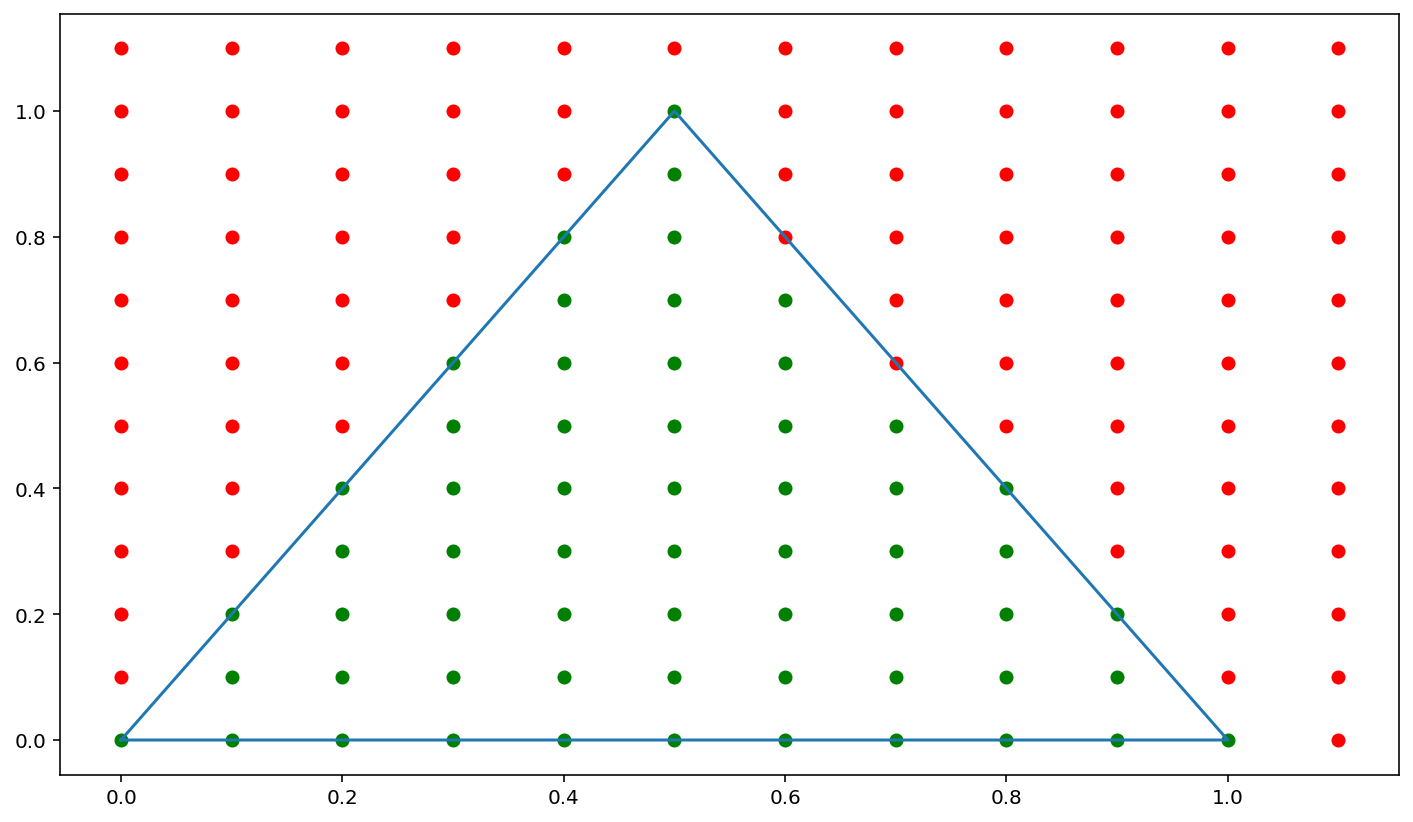

In [10]:
#TEST 2: compilo un array di valori reali distanziati e lo uso per creare una griglia di punti (con stessa ascissa e ordinata) 
       # Verifico se sono o meno interni al triangolo e plotto
import numpy as np
import matplotlib.pyplot as plt 

point_list_x_T = []
point_list_y_T = []
point_list_x_F = []
point_list_y_F = []
t1 = np.arange(0.0, 1.2, 0.1)
#for i in range(0, 12):
 #   for j in range (0, 12):
  #      x = i * 0.2 
   #     y = j * 0.2
for x in t1:
    for y in t1:
        pnt = (x, y)
        #print("il punto ({0}, {1}) è nel triangolo ABC ? ".format(pnt[0], pnt[1]),tri.in_triangle(pnt[0], pnt[1]))
        if tri.in_triangle(pnt[0], pnt[1]) is True:
            point_list_x_T.append(pnt[0])
            point_list_y_T.append(pnt[1])
        else:
            point_list_x_F.append(pnt[0])
            point_list_y_F.append(pnt[1])
            

plt.plot([0, 1, 0.5, 0], [0, 0, 1, 0])
plt.scatter(point_list_x_T ,point_list_y_T,color='green')
plt.scatter(point_list_x_F ,point_list_y_F,color='red')
#plt.axis([0, 6, 0, 20])
plt.show()

Noto che alcuni punti della frontiera sembrano non appartenere al triangolo. Questo però può essere dovuto a tre possibili motivi: 

1- è solo un problema di visualizzazione grafica, i pallini sono grassotti ma in realtà sono centrati all'esterno del triangolo; ---> aggiornamento : basta cambiare la size e vedere che il problema rimane 

2- è un problema di approssimazione, cioè per piccole discrepanze dovute all'errore macchina i valori sulla frontiera possono diventare essere interni o esterni al triangolo a caso; 

3- ho un problema con il mio algoritmo (ma sono fiducioso che questo non accada :) )

Sarebbe bello calcolare un indice che mi indichi l'efficienza dell'algoritmo valutando la percentuale di errori che ottengo.

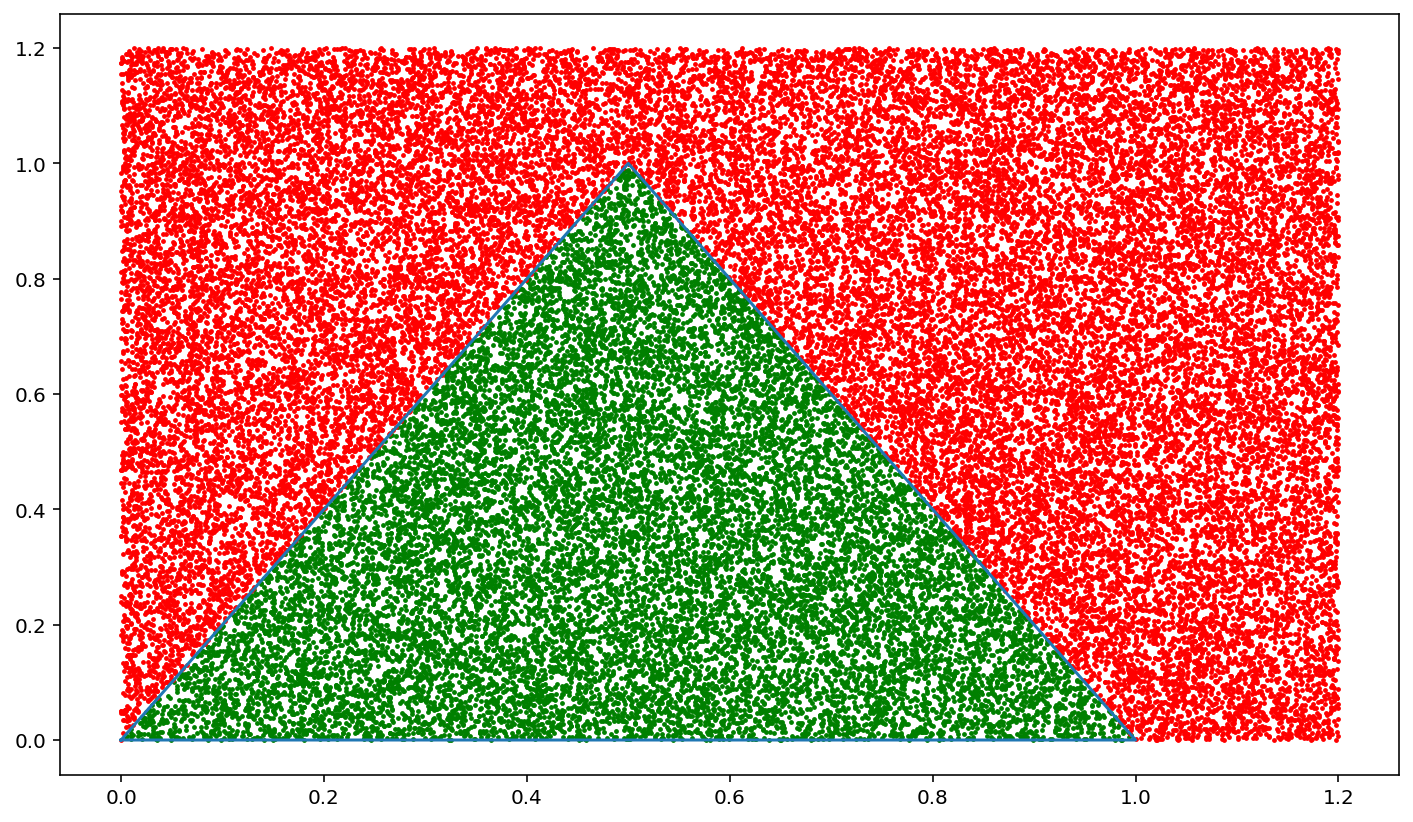

In [13]:
#TEST 3: creo punti random con distribuzione uniforme in (0, 1.2) e ripeto il metodo precedente 
import random as rnd

point_list_x_T = []
point_list_y_T = []
point_list_x_F = []
point_list_y_F = []


for i in range(1, 50001): #provo con 50'000 punti distribuiti uniformemente tra 0 e 1.2
    n1 = rnd.uniform(0,1.2)
    n2 = rnd.uniform(0,1.2)
    p = (n1,n2)
    
    if tri.in_triangle(p[0], p[1]) is True:
        point_list_x_T.append(p[0])
        point_list_y_T.append(p[1])
    else:
        point_list_x_F.append(p[0])
        point_list_y_F.append(p[1])    

plt.plot([0, 1, 0.5, 0], [0, 0, 1, 0])            
plt.scatter(point_list_x_T ,point_list_y_T,color='green',s=2)
plt.scatter(point_list_x_F ,point_list_y_F,color='red',s=2)
#plt.axis([0, 6, 0, 20])
plt.show()


Ok, sembra funzionare, tranne per qualche piccolo errore in prossimità della frontiera, come visto in precedenza.

In [14]:

#END BEPPE CODE



In [15]:
class punto:
    def __init__(self, coordx, coordy):
        

        self.x = coordx
        self.y = coordy

In [16]:
import math as m

class segmento:
    def __init__(self, p1, p2):
        self.i = p1
        self.f = p2
    
    def readable(self):
        return print("({},{}), ({},{})".format(self.i.x, self.i.y, self.f.x, self.f.y))
    
    def p_medio(self):
        Mx = (self.i.x + self.f.x)/2.0
        My = (self.i.y + self.f.y)/2.0
        p_med = punto(Mx , My)
        return p_med
    
    def retta(self):
        if (self.f.x - self.i.x) == 0:
            return self.f.x
        else:
            m = (self.f.y - self.i.y)/(self.f.x - self.i.x)                       #coeff. angolare
            q = (-self.i.x)*m + self.i.y                                          #q = self.i.y - self.i.x*m
            return [m, q]
        
    def distanza(self, p_ext):
        if (self.f.x - self.i.x) == 0:
            return p_ext.x - self.retta()
        else:
            return abs(p_ext.y - (self.retta()[0]*p_ext.x + self.retta()[1])) / ((1+self.retta()[0]**2)**0.5)
    
    def contiene(self, p):
        return p.y == self.retta()[0]*p.x + self.retta()[1]
    
    def lunghezza(self):
        l = m.sqrt( (self.f.x-self.i.x)**2 + (self.f.y -self.i.y)**2)
        return l


In [17]:
class triangolo:
    def __init__(self, p1, p2, p3):
        self.A = p1
        self.B = p2
        self.C = p3
        self.vertici = [p1, p2, p3]
        self.AB = segmento(self.A, self.B)
        self.BC = segmento(self.B, self.C)
        self.CA = segmento(self.C, self.A)
    
    def lati (self):
        AB = self.AB
        BC = self.BC
        CA = self.CA
        return [AB, BC, CA]
    
    def perimetro(self):
        P = self.AB.lunghezza() + self.BC.lunghezza() + self.CA.lunghezza()
        return P
    
    def altezze(self):
        h1 = self.AB.distanza(self.C)
        h2 = self.BC.distanza(self.A)
        h3 = self.CA.distanza(self.B)
        return [h1, h2, h3]

    def mediane(self):
        M = self.AB.p_medio()
        N = self.BC.p_medio()
        K = self.CA.p_medio()
        AN = segmento(self.A, N)
        BK = segmento(self.B, K)
        CM = segmento(self.C, M)
        return [AN, BK, CM]
    
    def baricentro(self):
        Bx = (self.A.x + self.B.x + self.C.x)/3
        By = (self.A.y + self.B.y + self.C.y)/3
        B = punto(Bx, By)
        return B
        
        
    def area(self):
        p = self.perimetro()/2
        AB = self.AB
        BC = self.BC
        CA = self.CA
        a = m.sqrt(p*(p-AB.lunghezza())*(p-BC.lunghezza())*(p-CA.lunghezza()))
        return a
    
    def half_t(self):                                     #triangolo di punti medi
        mp1 = self.AB.p_medio()
        mp2 = self.BC.p_medio()
        mp3 = self.CA.p_medio()
        
        return triangolo(mp1, mp2, mp3)
    
    def container(self, pp):                              #usi distanze dai lati del triangolo dimezzato (altezze)
        
        h_t = self.half_t()
        
        h1 = h_t.altezze()[0]
        h2 = h_t.altezze()[1]
        h3 = h_t.altezze()[2]
        
        if (h_t.AB.distanza(pp) <= h3
           and h_t.BC.distanza(pp) <= h2
           and h_t.CA.distanza(pp) <= h1):
            return True
        else:
            return False

In [42]:
p = punto(1,1)
w = punto(4,1)
s = punto(4,5)
q = punto(3,1)

In [24]:
seg = segmento(p,w)
M = seg.p_medio()


print(seg.readable())             #perchè dà none? Perché seg.readable non RITORNA alcun valore. Li stampa e basta! Ne parliamo venerdì
print(M.x)
print(seg.contiene(s))
seg.lunghezza()

(1,1), (4,1)
None
2.5
False


3.0

In [47]:
tr = triangolo(w,p,s)
print(tr.vertici)
print(tr.A, tr.A.x)
print(tr.lati())
tr.lati()[0].f.x

[<__main__.punto object at 0x7f415ed45390>, <__main__.punto object at 0x7f415eca7ad0>, <__main__.punto object at 0x7f415ed61190>]
<__main__.punto object at 0x7f415ed45390> 4
[<__main__.segmento object at 0x7f415ecd0710>, <__main__.segmento object at 0x7f415ecd0150>, <__main__.segmento object at 0x7f415ecd0190>]


1

In [26]:
print(tr.mediane())
tr.perimetro(), tr.mediane()[0].f.x

[<__main__.segmento object at 0x7f415ed83ad0>, <__main__.segmento object at 0x7f415ed832d0>, <__main__.segmento object at 0x7f415ed83910>]


(12.0, 4.0)

In [49]:
tr.container(p)

True

In [27]:
print(tr.CA.retta())
print(tr.mediane()[0].lunghezza())
A = tr.area()
A

[1.3333333333333333, -0.33333333333333304]
3.605551275463989


6.0

In [28]:
B = tr.baricentro()
print(B.x, B.y)
tr.mediane()[1].contiene(B)

3.0 2.3333333333333335


False

-----------------------------------------------------

NICOLO

In [2]:
class punkt:
    def __init__(self, xval, yval):
        self.x = xval
        self.y = yval
        
    def readable(self):
        return '({0}, {1})'.format(
        self.x,
        self.y,
        )

In [3]:
class segment:
    def __init__(self, p1, p2):
        self.extreme1 = p1
        self.extreme2 = p2
        
        if self.extreme1.x == self.extreme2.x:
            self.b = 0
            self.c = self.extreme1.x
        else:
            self.m = (self.extreme1.y - self.extreme2.y)/(self.extreme1.x - self.extreme2.x)
            self.q = self.extreme1.y - self.m*self.extreme1.x
    
    def readable(self):
        return 'From ({0}, {1}) to ({2}, {3})'.format(
        self.extreme1.x,
        self.extreme1.y,
        self.extreme2.x,
        self.extreme2.y
        )
    
    def mean_p(self):
        mean_p = punkt( (self.extreme1.x+self.extreme2.x)/2, (self.extreme1.y+self.extreme2.y)/2 )
        #mean_p.readable()
        return mean_p
    
    def linefy(self, p_eval):                                   #valuta equazione della retta con coordinate di un punto
        if self.extreme1.x == self.extreme2.x:
            return p_eval.x - self.c
        else:        
            return p_eval.y - self.m*p_eval.x - self.q
    
    def contains(self, p_input):                                #da chiamare con un oggetto punto
        check = self.linefy(p_input)
        #print('check= ', check)
        if check == 0:
            return True
        else:
            return False
    
    def length(self):
        l = ((self.extreme1.x - self.extreme2.x)**2 + (self.extreme1.y - self.extreme2.y)**2)**0.5
        return l
    
    def distance_to(self, ext_p):                               #usa formula distanza punto-retta
        if self.extreme1.x == self.extreme2.x:
            return abs(self.linefy(ext_p))
        else:
            return abs(self.linefy(ext_p)) / ((1+self.m**2)**0.5)


In [16]:
class triangle:
    def __init__(self, p1, p2, p3):
        self.vert1 = p1
        self.vert2 = p2
        self.vert3 = p3
        
        self.s1 = segment(self.vert1, self.vert2)
        self.s2 = segment(self.vert2, self.vert3)
        self.s3 = segment(self.vert3, self.vert1)
        
    def readable(self):
        return 'Vertici: ({0}, {1}), ({2}, {3}), ({4}, {5})'.format(
        self.vert1.x,
        self.vert1.y,
        self.vert2.x,
        self.vert2.y,
        self.vert3.x,
        self.vert3.y,
        )

    def sides(self):
        print('Sides are:')
        self.s1.readable()
        self.s2.readable()
        self.s3.readable()
        
    def perimeter(self):
        
        p = self.s1.length()+ self.s2.length() + self.s3.length()
        return p
    
    def medians(self):
        mp1 = self.s1.mean_p()
        mp2 = self.s2.mean_p()
        mp3 = self.s3.mean_p()
        
        m1 = segment(p3, mp1)
        m2 = segment(p1, mp2)
        m3 = segment(p2, mp3)
        
        return m1, m2, m3
    
    def heights(self):
        h1 = self.s2.distance_to(self.vert1)
        h2 = self.s3.distance_to(self.vert2)
        h3 = self.s1.distance_to(self.vert3)
        
        return h1, h2, h3
        
    def halved_t(self):                                     #triangolo di punti medi
        mp1 = self.s1.mean_p()
        mp2 = self.s2.mean_p()
        mp3 = self.s3.mean_p()
        
        return triangle(mp1, mp2, mp3)
    
    def contains(self, point):                              #usi distanze dai lati del triangolo dimezzato (altezze)
        
        h_t = self.halved_t()
        h1, h2, h3 = h_t.heights()
        
        if (h_t.s1.distance_to(point) <= h3
           and h_t.s3.distance_to(point) <= h2
           and h_t.s2.distance_to(point) <= h1):
            return True
        else:
            return False


In [12]:
p1 = punkt(0, 0)
p2 = punkt(3, 6)

segm = segment(p1, p2)

p_prova = punkt(2,5)
segm.contains(p_prova)


False

In [15]:
p1 = punkt(3, 11)
p2 = punkt(10, 2)
p3 = punkt(3, 2)

t = triangle(p1, p2, p3)
print(t.readable())

print(t.halved_t().readable())

p = punkt(3, 3)

print(t.contains(p))

Vertici: (3, 11), (10, 2), (3, 2)
Vertici: (6.5, 6.5), (6.5, 2.0), (3.0, 6.5)
True


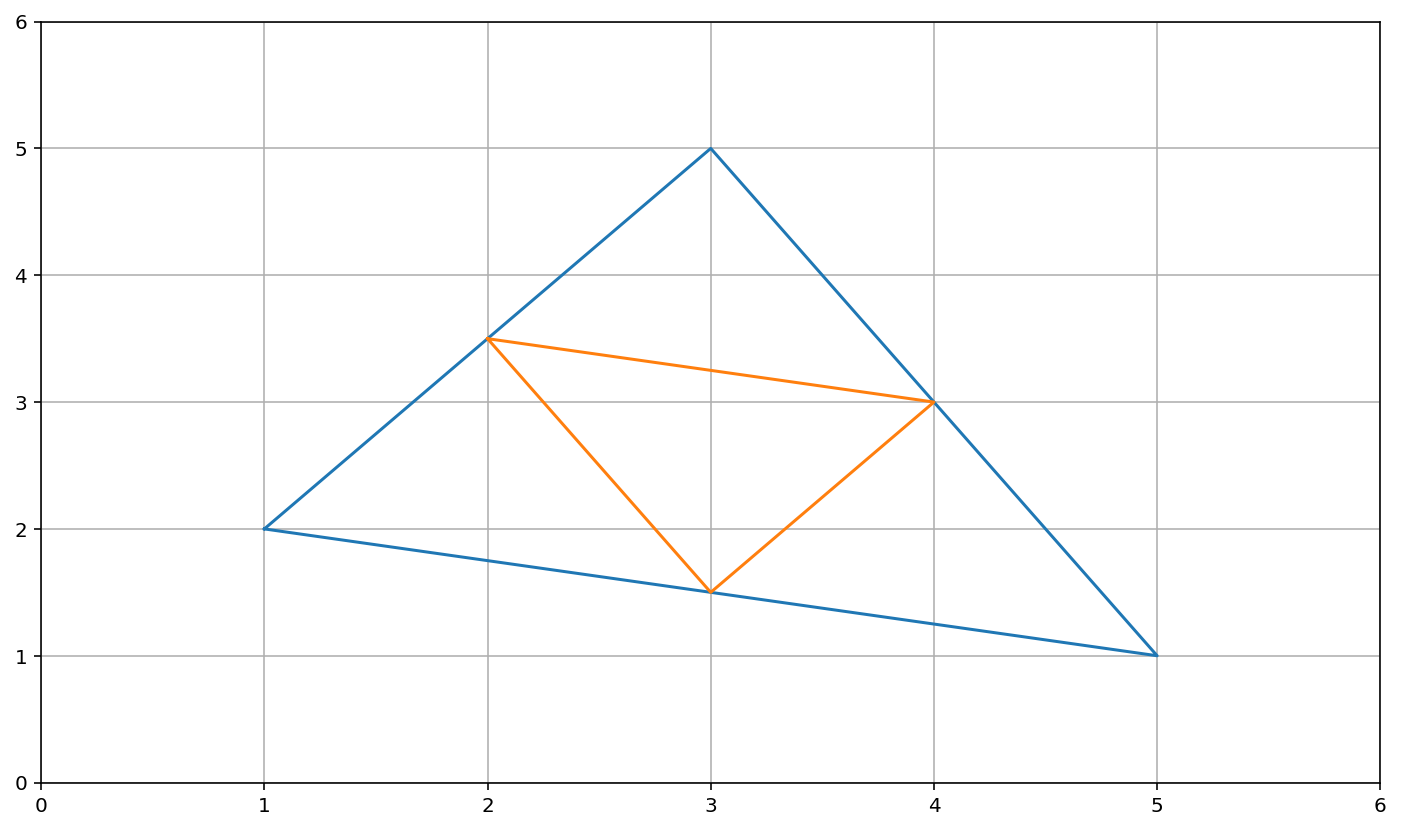

In [5]:
import matplotlib.pyplot as plt

plt.plot([1, 3, 5, 1], [2, 5, 1, 2])
plt.plot([2, 4, 3, 2], [3.5, 3, 1.5, 3.5])
plt.xlim((0, 6))
plt.ylim((0, 6))
plt.grid()
#plt.scatter(3.05, 2.52, s=15000)
#plt.scatter(3.05, 2.52, s=1000 , label='illuminati confirmed?')
#plt.legend()